# Setup

In [1]:
import os
from pathlib import Path

os.chdir(Path.cwd().parent)
# print("cwd is now:", Path.cwd())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from data_loader import scores_df
from fit import fit_statistical_model

null performances after coercion: 0
after filter num benchmarks 1965
after merge with model versions 1965
after date filter (>= 2022-11-01) 1766
after merge with benchmark dates 1766
Original number of rows: 1766
Number of rows after aggregation: 1324


In [3]:

import seaborn as sns
sns.set()
sns.set_style("whitegrid")

# Custom color palette
custom_colors = [
    '#00A5A6',  # teal
    '#E03D90',  # pink
    '#FC6538',  # orange
    '#6A3ECB',  # purple
    '#0058DC',  # blue
    '#EA8D00',  # yellow
    '#B087F4',  # lightPurple
    '#279E27',  # green
    '#009AF1',  # lightBlue
    '#015D90',  # darkBlue
    '#EA4831',  # red
    '#E1C700',  # yellow2
    '#46FFFF',  # turquoise
    '#63F039',  # lightGreen
]

sns.set_palette(custom_colors)
colors = sns.color_palette()

# === Seaborn global settings ===
sns.set_theme(
    style="whitegrid",        # or "darkgrid", "ticks", "white"
    palette=custom_colors,    # your custom color palette
    context="notebook"        # scaling for labels/titles ("paper", "notebook", "talk", "poster")
)

# === Matplotlib global settings (rcParams) ===
plt.rcParams.update({
    # Figure
    "figure.figsize": (8, 5),
    "figure.dpi": 120,
    
    # Axes
    "axes.titley": 1.02,
    "axes.titlesize": 14,
    "axes.titlelocation": 'center',
    "axes.titlepad": 0,
    "axes.labelsize": 12,
    "axes.labelpad": 10,           # spacing between axis and label
    "axes.spines.top": False,
    "axes.spines.right": False,
    
    # Ticks
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    # tick marks size
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    
    # tick visibility
    "xtick.top": False,
    "xtick.bottom": True,
    "ytick.left": True,
    "ytick.right": False,
    
    # Legend
    "legend.fontsize": 10,
    "legend.loc": "upper left",
    "legend.frameon": True,
    "legend.borderaxespad": 0,

    
    # Lines and markers
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "lines.markeredgecolor": 'auto',   # white outline (stroke)
    "lines.markeredgewidth": 0.5,   
    # title alignment left
    

    
    
    # Error bars
    "errorbar.capsize": 3,
    
    # Font
    "font.family": "Arial",
    "font.sans-serif": ["DejaVu Sans"],
    
    # Grid
    "grid.alpha": 0.3,
    "grid.linestyle": "-",
    "grid.color": "lightgray",
})


In [4]:
anchor_mode = "model"  # "model", "benchmark"
anchor_benchmark = "Winogrande"
anchor_difficulty = 0
anchor_slope = 1
anchor_model1 = "claude-2.0"
anchor_model1_capability = 1.177630
anchor_model2 = "claude-3-opus-20240229"
anchor_model2_capability = 1.311554

df_anchor, df_cm_anchor, df_db_anchor = fit_statistical_model(
    scores_df,
    anchor_mode=anchor_mode,
    anchor_benchmark=anchor_benchmark,
    anchor_difficulty=anchor_difficulty,
    anchor_slope=anchor_slope,
    anchor_model1=anchor_model1,
    anchor_model1_capability=anchor_model1_capability,
    anchor_model2=anchor_model2,
    anchor_model2_capability=anchor_model2_capability,
)

df_cm_anchor["date_obj"] = pd.to_datetime(df_cm_anchor["date"])

# anchor_benchmark = "Winogrande"
# anchor_difficulty = 0
# anchor_slope = 1
# df_anchor, df_cm_anchor, df_db_anchor = fit_statistical_model(scores_df, anchor_benchmark, anchor_difficulty, anchor_slope)

# # Convert date strings to datetime objects
# df_cm_anchor['date_obj'] = pd.to_datetime(df_cm_anchor['date'])

`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 4.9146e+01, final cost 3.5123e+00, first-order optimality 8.01e-04.


# Figure 15 (Appendix E.2 Varying the anchors)

In [5]:
all_runs = {}  # will map benchmark_name -> dict of outputs
failed = []  # keep track of anything that errors out

# --- loop --------------------------------------------------------------------
for _, row in df_db_anchor.iterrows():
    anchor_benchmark = row["benchmark_name"]  # e.g. "HellaSwag"
    anchor_difficulty = float(row["estimated_difficulty"])
    anchor_slope = float(row["estimated_slope"])

    try:
        df, df_cm, df_db = fit_statistical_model(
            scores_df,
            anchor_mode="benchmark",
            anchor_benchmark=anchor_benchmark,
            anchor_difficulty=anchor_difficulty,
            anchor_slope=anchor_slope,
        )
        all_runs[anchor_benchmark] = {
            "df1": df,
            "df_cm1": df_cm,
            "df_db": df_db,
            # cache the anchor values for reference
            "anchor_difficulty": anchor_difficulty,
            "anchor_slope": anchor_slope,
        }
    except Exception as e:
        failed.append((anchor_benchmark, str(e)))

# --- post-processing (optional) ----------------------------------------------
# 1) quick glance at what failed
if failed:
    print("Benchmarks that raised errors:", failed)

# 2) pull out the difficulty/slope re-estimates across all runs
summary = pd.concat(
    {
        k: v["df_db"][["benchmark_name", "estimated_difficulty", "estimated_slope"]]
        for k, v in all_runs.items()
    },
    names=["anchor_benchmark"],
).reset_index(level=0)

`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 4.9299e+01, final cost 3.4415e+00, first-order optimality 1.15e-04.
`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 5.0244e+01, final cost 3.4414e+00, first-order optimality 5.12e-04.
`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 5.0069e+01, final cost 3.4413e+00, first-order optimality 4.86e-04.
`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 5.0068e+01, final cost 3.4420e+00, first-order optimality 3.86e-04.
`ftol` termination condition is satisfied.
Function evaluations 29, initial cost 5.0170e+01, final cost 3.4418e+00, first-order optimality 4.64e-04.
`ftol` termination condition is satisfied.
Function evaluations 30, initial cost 5.0149e+01, final cost 3.4412e+00, first-order optimality 2.61e-04.
`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 5.0143e+01, final cost 3.

In [6]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------------------------
# 1)  DIFFICULTY  ––  variation of each benchmark’s difficulty estimate
# ---------------------------------------------------------------------------
difficulty_rows = []

for anchor, run in all_runs.items():
    df_db = run["df_db"]  # difficulty table from that fit
    out = df_db[["benchmark_name", "estimated_difficulty"]].copy()
    out["anchor_benchmark"] = anchor  # remember which fit this came from
    difficulty_rows.append(out)

difficulty_long = pd.concat(difficulty_rows, ignore_index=True)

# drop the trivial row where the benchmark was forced to be the anchor (always fixed):
difficulty_long = difficulty_long[
    difficulty_long["benchmark_name"] != difficulty_long["anchor_benchmark"]
]

difficulty_stats = (
    difficulty_long.groupby("benchmark_name")["estimated_difficulty"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        cv=lambda s: s.std(ddof=0) / s.mean(),  # coefficient of variation
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 2)  CAPABILITY  ––  variation of each model’s capability estimate
# ---------------------------------------------------------------------------
capability_rows = []

for anchor, run in all_runs.items():
    df_cm = run["df_cm1"]  # capability table from that fit
    out = df_cm[["model", "estimated_capability"]].copy()
    out["anchor_benchmark"] = anchor
    capability_rows.append(out)

capability_long = pd.concat(capability_rows, ignore_index=True)

capability_stats = (
    capability_long.groupby("model")["estimated_capability"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        cv=lambda s: s.std(ddof=0) / s.mean(),
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 3)  quick look
# ---------------------------------------------------------------------------
print("=== variation in benchmark difficulties ===")
display(difficulty_stats)

print("\n=== variation in model capabilities ===")
display(capability_stats)

=== variation in benchmark difficulties ===


,mean,std,min,max,cv
benchmark_name,,,,,
ANLI,0.717305,0.037147,0.642944,0.787537,0.051083
ARC AI2,0.128645,0.059227,0.040713,0.231176,0.454129
ARC-AGI,2.149251,0.035426,2.092472,2.240755,0.016259
Aider polyglot,1.805822,0.028755,1.743274,1.877996,0.015707
BBH,0.404038,0.048206,0.325839,0.491101,0.117686
Balrog,2.435686,0.043284,2.384185,2.545006,0.017529
CadEval,1.843694,0.029335,1.781858,1.918011,0.015695
Cybench,2.787906,0.047513,2.730147,2.905817,0.016811
DeepResearch Bench,2.327366,0.039441,2.273614,2.427672,0.016716



=== variation in model capabilities ===


,mean,std,min,max,cv
model,,,,,
Baichuan-2-13B-Base,0.351305,0.050409,0.273721,0.442799,0.141590
Baichuan-2-7B-Base,0.055720,0.063281,-0.039039,0.164756,1.120653
Baichuan-7B,-0.122944,0.071486,-0.238314,-0.003227,-0.573748
Cerebras-GPT-13B,-0.398456,0.084760,-0.545141,-0.262371,-0.209903
CodeQwen1.5-7B,0.063320,0.063017,-0.033675,0.171842,0.982025
...,...,...,...,...,...
starcoder2-15b,0.457443,0.046064,0.381887,0.542652,0.099365
starcoder2-3b,-0.156012,0.073078,-0.275409,-0.034392,-0.462210
starcoder2-7b,0.016103,0.065167,-0.085678,0.127447,3.993291


In [7]:
# ---------------------------------------------------------------------------
# 4)  Rank correlation across fits (Spearman) for difficulties and capabilities
#     Robust to duplicates and missing values
# ---------------------------------------------------------------------------


def _spearman_corr_from_long(
    df_long: pd.DataFrame, index_col: str, columns_col: str, values_col: str
) -> pd.DataFrame:
    # Allow duplicates by aggregating with mean; coerce to numeric in case of stray dtypes
    wide = df_long.pivot_table(
        index=index_col,
        columns=columns_col,
        values=values_col,
        aggfunc="mean",
    )
    wide = wide.apply(pd.to_numeric, errors="coerce")

    # Drop rows that are entirely NaN
    wide = wide.dropna(axis=0, how="all")

    # Need at least two fits (columns) to compute a correlation matrix
    if wide.shape[1] < 2:
        return pd.DataFrame()

    # Compute Spearman by ranking then applying Pearson correlation
    ranks = wide.rank(axis=0, method="average", na_option="keep")
    corr = ranks.corr(method="pearson", min_periods=2)
    return corr


print("=== Spearman rank correlation across fits (benchmark difficulties) ===")
spearman_difficulty = _spearman_corr_from_long(
    difficulty_long,
    index_col="benchmark_name",
    columns_col="anchor_benchmark",
    values_col="estimated_difficulty",
)
if spearman_difficulty.empty:
    print("Not enough comparable fits to compute correlations for difficulties.")
else:
    display(spearman_difficulty)
    mean_rho_difficulty = (
        spearman_difficulty.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per fit (difficulties):")
    display(mean_rho_difficulty)

print("\n=== Spearman rank correlation across fits (model capabilities) ===")
spearman_capability = _spearman_corr_from_long(
    capability_long,
    index_col="model",
    columns_col="anchor_benchmark",
    values_col="estimated_capability",
)
if spearman_capability.empty:
    print("Not enough comparable fits to compute correlations for capabilities.")
else:
    display(spearman_capability)
    mean_rho_capability = (
        spearman_capability.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per fit (capabilities):")
    display(mean_rho_capability)

=== Spearman rank correlation across fits (benchmark difficulties) ===


anchor_benchmark,ANLI,ARC AI2,ARC-AGI,Aider polyglot,BBH,Balrog,CadEval,Cybench,DeepResearch Bench,Factorio learning environment,...,SWE-Bench verified,ScienceQA,SimpleBench,Terminal Bench,The Agent Company,TriviaQA,VPCT,VideoMME,WeirdML,Winogrande
anchor_benchmark,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000000,0.999294,0.998850,0.999255,0.999779,0.998757,0.999095,0.999136,0.998990,0.999350,...,0.999196,0.999685,0.998777,0.998826,0.998900,0.999572,0.998756,0.999452,0.998808,0.999456
ARC AI2,0.999294,1.000000,0.998488,0.998711,0.999540,0.998466,0.998623,0.998857,0.998694,0.999061,...,0.998789,0.999641,0.998452,0.998544,0.998515,0.999385,0.998446,0.999639,0.998466,0.999464
ARC-AGI,0.998850,0.998488,1.000000,0.999496,0.998739,0.999610,0.999678,0.999237,0.999447,0.999266,...,0.999778,0.998723,0.999885,0.999504,1.000000,0.999243,0.999780,0.998804,1.000000,0.998966
Aider polyglot,0.999255,0.998711,0.999496,1.000000,0.999049,0.999241,0.999885,0.999044,0.999024,0.999199,...,0.999776,0.999002,0.999356,0.999250,0.999581,0.999318,0.999303,0.998973,0.999421,0.999087
BBH,0.999779,0.999540,0.998739,0.999049,1.000000,0.998695,0.998925,0.999090,0.998921,0.999309,...,0.999060,1.000000,0.998689,0.998775,0.998777,0.999580,0.998678,0.999626,0.998710,0.999550
Balrog,0.998757,0.998466,0.999610,0.999241,0.998695,1.000000,0.999347,0.999541,0.999756,0.999411,...,0.999405,0.998689,0.999783,0.999885,0.999535,0.999206,0.999885,0.998790,0.999692,0.998946
CadEval,0.999095,0.998623,0.999678,0.999885,0.998925,0.999347,1.000000,0.999101,0.999145,0.999221,...,1.000000,0.998890,0.999508,0.999323,0.999777,0.999299,0.999440,0.998909,0.999588,0.999045
Cybench,0.999136,0.998857,0.999237,0.999044,0.999090,0.999541,0.999101,1.000000,0.999706,0.999886,...,0.999407,0.999086,0.999331,0.999751,0.999198,0.999530,0.999390,0.999169,0.999281,0.999302
DeepResearch Bench,0.998990,0.998694,0.999447,0.999024,0.998921,0.999756,0.999145,0.999706,1.000000,0.999614,...,0.999525,0.998915,0.999643,0.999540,0.999362,0.999452,0.999757,0.999020,0.999540,0.999183



Mean off-diagonal Spearman per fit (difficulties):


,mean_rho
anchor_benchmark,
PIQA,0.999596
OSUniverse,0.999596
TriviaQA,0.999487
GSO-Bench,0.999487
OSWorld,0.999443
SWE-Bench verified,0.999435
LAMBADA,0.999403
Factorio learning environment,0.999403
Winogrande,0.999341



=== Spearman rank correlation across fits (model capabilities) ===


anchor_benchmark,ANLI,ARC AI2,ARC-AGI,Aider polyglot,BBH,Balrog,CadEval,Cybench,DeepResearch Bench,Factorio learning environment,...,SWE-Bench verified,ScienceQA,SimpleBench,Terminal Bench,The Agent Company,TriviaQA,VPCT,VideoMME,WeirdML,Winogrande
anchor_benchmark,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000000,0.999977,0.999979,0.999969,0.999956,0.999990,0.999985,0.999992,0.999992,0.999994,...,0.999990,0.999981,0.999973,0.999985,0.999985,0.999992,0.999985,0.999992,0.999981,0.999975
ARC AI2,0.999977,1.000000,0.999985,0.999977,0.999981,0.999979,0.999981,0.999981,0.999985,0.999983,...,0.999979,0.999990,0.999977,0.999979,0.999975,0.999981,0.999973,0.999981,0.999985,0.999990
ARC-AGI,0.999979,0.999985,1.000000,0.999983,0.999969,0.999987,0.999990,0.999985,0.999992,0.999987,...,0.999987,0.999992,0.999987,0.999990,0.999983,0.999987,0.999979,0.999985,0.999990,0.999987
Aider polyglot,0.999969,0.999977,0.999983,1.000000,0.999960,0.999977,0.999979,0.999975,0.999979,0.999977,...,0.999977,0.999983,0.999990,0.999983,0.999973,0.999977,0.999971,0.999975,0.999987,0.999979
BBH,0.999956,0.999981,0.999969,0.999960,1.000000,0.999962,0.999964,0.999960,0.999964,0.999962,...,0.999962,0.999973,0.999960,0.999962,0.999958,0.999964,0.999956,0.999960,0.999969,0.999973
Balrog,0.999990,0.999979,0.999987,0.999977,0.999962,1.000000,0.999992,0.999998,0.999994,0.999996,...,0.999996,0.999983,0.999985,0.999992,0.999992,0.999992,0.999996,0.999998,0.999990,0.999979
CadEval,0.999985,0.999981,0.999990,0.999979,0.999964,0.999992,1.000000,0.999990,0.999990,0.999992,...,0.999992,0.999992,0.999983,0.999987,0.999987,0.999994,0.999987,0.999990,0.999992,0.999987
Cybench,0.999992,0.999981,0.999985,0.999975,0.999960,0.999998,0.999990,1.000000,0.999996,0.999998,...,0.999994,0.999981,0.999983,0.999990,0.999990,0.999990,0.999994,1.000000,0.999987,0.999977
DeepResearch Bench,0.999992,0.999985,0.999992,0.999979,0.999964,0.999994,0.999990,0.999996,1.000000,0.999998,...,0.999994,0.999985,0.999983,0.999994,0.999990,0.999990,0.999987,0.999996,0.999987,0.999981



Mean off-diagonal Spearman per fit (capabilities):


,mean_rho
anchor_benchmark,
GSO-Bench,0.999988
Factorio learning environment,0.999988
Lech Mazur Writing,0.999988
Balrog,0.999988
DeepResearch Bench,0.999988
FrontierMath-Tier-4-2025-07-01-Private,0.999988
PIQA,0.999988
OSUniverse,0.999988
Cybench,0.999987


In [8]:
all_runs = {}  # will map model_pair -> dict of outputs
failed = []  # keep track of anything that errors out

# --- Create model pairs for anchoring -------------------------------------
# Get unique models with their estimated capabilities
models_with_capability = df_cm_anchor[
    ["model", "estimated_capability"]
].drop_duplicates()
models_list = models_with_capability.to_dict("records")

# Create pairs of models to use as anchors
# You can adjust this logic based on your needs
model_pairs = []
for i in range(len(models_list) - 1):
    # Each model paired with the next one
    model_pairs.append((models_list[i], models_list[i + 1]))

# Alternatively, you could pair each model with a fixed reference model:
# reference_model = models_list[0]  # or find a specific model
# model_pairs = [(reference_model, model) for model in models_list[1:]]

# --- loop over model pairs ------------------------------------------------
for model1_info, model2_info in model_pairs:
    anchor_model1 = model1_info["model"]
    anchor_model1_capability = float(model1_info["estimated_capability"])
    anchor_model2 = model2_info["model"]
    anchor_model2_capability = float(model2_info["estimated_capability"])

    # Create a key for storing results
    pair_key = f"{anchor_model1}_{anchor_model2}"

    try:
        df, df_cm, df_db = fit_statistical_model(
            scores_df,
            anchor_mode="model",
            anchor_benchmark=anchor_benchmark,  # Keep the same benchmark
            anchor_difficulty=anchor_difficulty,  # Keep the same difficulty
            anchor_slope=anchor_slope,  # Keep the same slope
            anchor_model1=anchor_model1,
            anchor_model1_capability=anchor_model1_capability,
            anchor_model2=anchor_model2,
            anchor_model2_capability=anchor_model2_capability,
        )

        all_runs[pair_key] = {
            "df1": df,
            "df_cm1": df_cm,
            "df_db": df_db,
            # cache the anchor values for reference
            "anchor_model1": anchor_model1,
            "anchor_model1_capability": anchor_model1_capability,
            "anchor_model2": anchor_model2,
            "anchor_model2_capability": anchor_model2_capability,
        }
    except Exception as e:
        failed.append((pair_key, str(e)))

# --- post-processing (optional) ----------------------------------------------
# 1) quick glance at what failed
if failed:
    print("Model pairs that raised errors:", failed)

# 2) pull out the model capability estimates across all runs
summary_models = pd.concat(
    {k: v["df_cm1"][["model", "estimated_capability"]] for k, v in all_runs.items()},
    names=["anchor_model_pair"],
).reset_index(level=0)

# 3) pull out the benchmark difficulty/slope estimates across all runs
summary_benchmarks = pd.concat(
    {
        k: v["df_db"][["benchmark_name", "estimated_difficulty", "estimated_slope"]]
        for k, v in all_runs.items()
    },
    names=["anchor_model_pair"],
).reset_index(level=0)

print(f"Processed {len(all_runs)} model pair combinations")
print(f"Failed: {len(failed)} combinations")

`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 4.8758e+01, final cost 3.4732e+00, first-order optimality 4.67e-04.
`ftol` termination condition is satisfied.
Function evaluations 26, initial cost 4.8931e+01, final cost 3.4734e+00, first-order optimality 1.05e-03.
`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 4.8374e+01, final cost 3.4744e+00, first-order optimality 2.07e-04.
`ftol` termination condition is satisfied.
Function evaluations 25, initial cost 4.8291e+01, final cost 3.4753e+00, first-order optimality 3.36e-04.
`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 4.8659e+01, final cost 3.4776e+00, first-order optimality 3.33e-04.
`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 4.9444e+01, final cost 3.4782e+00, first-order optimality 3.94e-04.
`ftol` termination condition is satisfied.
Function evaluations 29, initial cost 4.9170e+01, final cost 3.

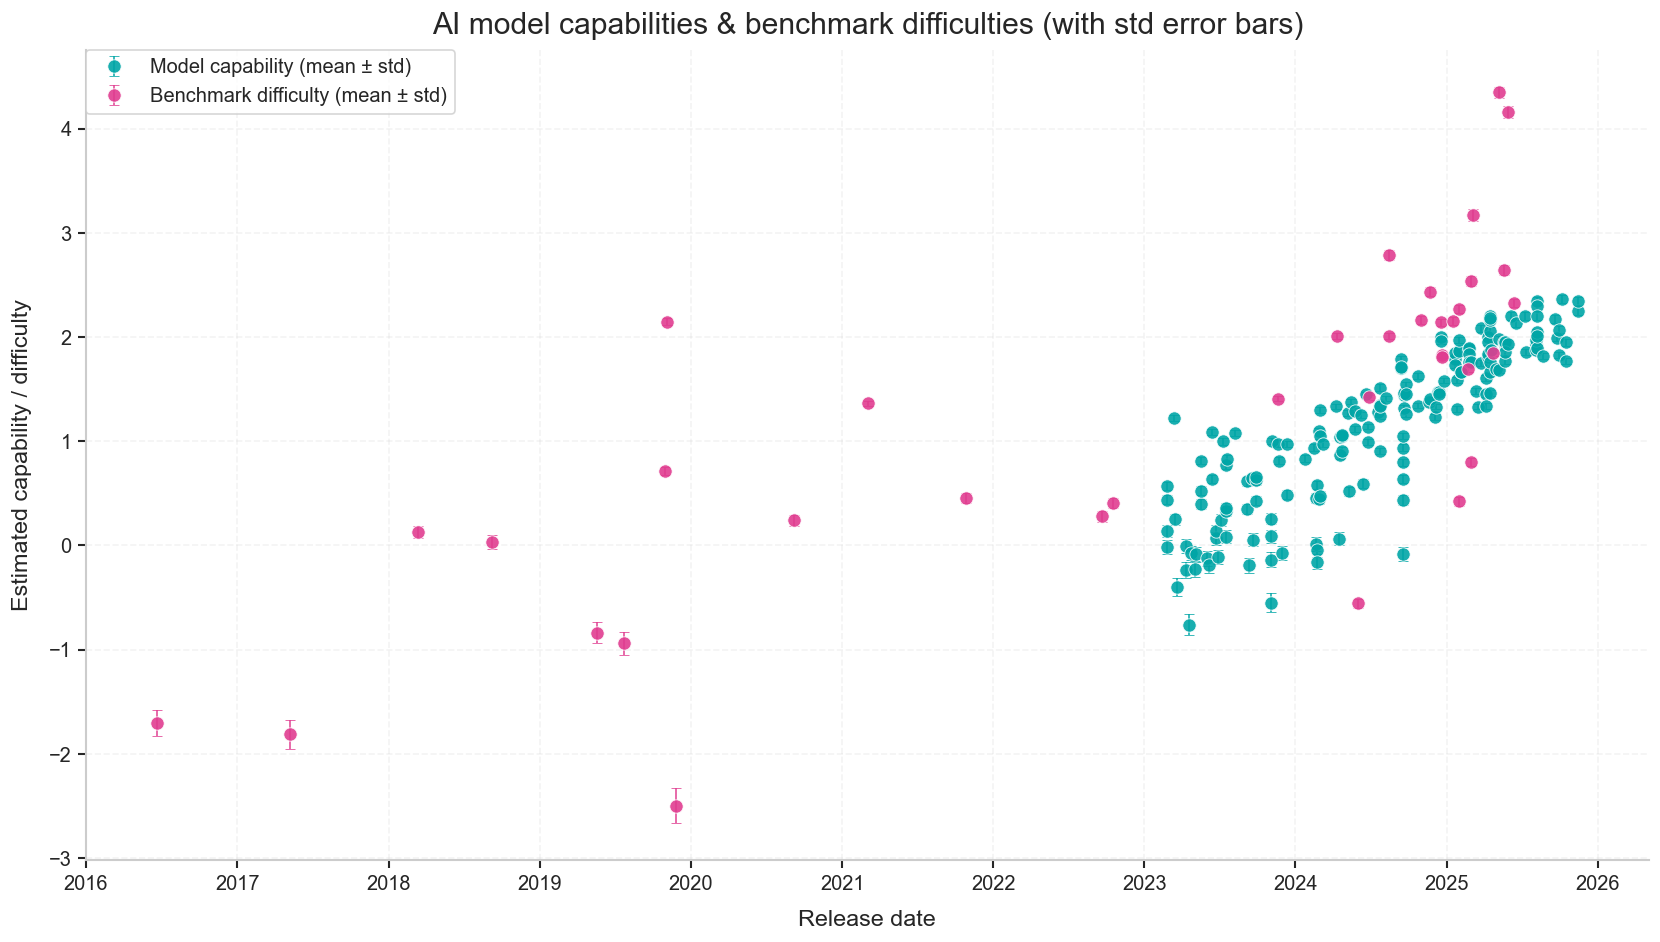

In [9]:
# Capabilities and difficulties over time with std error bars (from variation tables)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Expect these to exist from earlier cells:
# - capability_stats: index=model, columns include ['mean','std']
# - difficulty_stats: index=benchmark_name, columns include ['mean','std']
# - df_cm_anchor: per-model table with 'model' and 'date' (string) or 'date_obj'
# - df_db_anchor: per-benchmark table with 'benchmark_name' and 'benchmark_release_date'

# Merge stats with model release dates
cap_stats_df = capability_stats.reset_index()  # 'model', 'mean', 'std', ...
model_dates = df_cm_anchor[["model", "date"]].drop_duplicates(subset=["model"]).copy()
model_dates["date_obj"] = pd.to_datetime(model_dates["date"], errors="coerce")
cap_plot_df = (
    cap_stats_df.merge(model_dates, on="model", how="left")
    .dropna(subset=["date_obj", "mean"])  # require a date and mean
    .sort_values("date_obj")
)
cap_plot_df["std"] = cap_plot_df["std"].fillna(0.0)

# Merge stats with benchmark release dates
diff_stats_df = difficulty_stats.reset_index()  # 'benchmark_name', 'mean', 'std', ...
bench_dates = (
    df_db_anchor[["benchmark_name", "benchmark_release_date"]]
    .drop_duplicates(subset=["benchmark_name"])
    .copy()
)
bench_dates["benchmark_release_date"] = pd.to_datetime(
    bench_dates["benchmark_release_date"], errors="coerce"
)
diff_plot_df = (
    diff_stats_df.merge(bench_dates, on="benchmark_name", how="left")
    .dropna(subset=["benchmark_release_date", "mean"])  # require a date and mean
    .sort_values("benchmark_release_date")
)
diff_plot_df["std"] = diff_plot_df["std"].fillna(0.0)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.errorbar(
    cap_plot_df["date_obj"],
    cap_plot_df["mean"],
    yerr=cap_plot_df["std"],
    fmt="o",
    color=colors[0],
    ecolor=colors[0],
    markeredgecolor='white',

    elinewidth=1,
    capsize=3,
    alpha=0.9,
    label="Model capability (mean ± std)",
)

ax.errorbar(
    diff_plot_df["benchmark_release_date"],
    diff_plot_df["mean"],
    yerr=diff_plot_df["std"],
    fmt="o",
    color=colors[1],
    ecolor=colors[1],
    markeredgecolor='white',
    elinewidth=1,
    capsize=3,
    alpha=0.9,
    label="Benchmark difficulty (mean ± std)",
)

ax.set_xlabel("Release date", fontsize=14)
ax.set_ylabel("Estimated capability / difficulty", fontsize=14)
ax.set_title(
    "AI model capabilities & benchmark difficulties (with std error bars)", fontsize=18
)
# plt.savefig('outputs/figures/figure-15.svg', format='svg')


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_locator(mdates.YearLocator())
# fig.autofmt_xdate()

ax.grid(True, alpha=0.25, linestyle="--")
ax.legend(frameon=True, fontsize=12)

plt.tight_layout()
plt.savefig("outputs/change_anchor/anchor_error_bars.pdf")
plt.show()